In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

Descargamos los dataset y le damos un primer vistazo

In [2]:
data1 = pd.read_excel('E-commerce_train.xlsx', index_col='ID')
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8999 entries, 1 to 8999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      8999 non-null   object
 1   Mode_of_Shipment     8999 non-null   object
 2   Customer_care_calls  8999 non-null   int64 
 3   Customer_rating      8999 non-null   int64 
 4   Cost_of_the_Product  8999 non-null   int64 
 5   Prior_purchases      8999 non-null   int64 
 6   Product_importance   8999 non-null   object
 7   Gender               8999 non-null   object
 8   Discount_offered     8999 non-null   int64 
 9   Weight_in_gms        8999 non-null   int64 
 10  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 843.7+ KB


In [3]:
data2 = pd.read_excel('E-commerce_test.xlsx', index_col='ID')
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 9000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      2000 non-null   object
 1   Mode_of_Shipment     2000 non-null   object
 2   Customer_care_calls  2000 non-null   int64 
 3   Customer_rating      2000 non-null   int64 
 4   Cost_of_the_Product  2000 non-null   int64 
 5   Prior_purchases      2000 non-null   int64 
 6   Product_importance   2000 non-null   object
 7   Gender               2000 non-null   object
 8   Discount_offered     2000 non-null   int64 
 9   Weight_in_gms        2000 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 171.9+ KB


En primera vista podemos ver que todos los registros estan completos.<br>
Por un lado, hay algunos registros que vamos a tener que pasar a numero para poder usarlos en el modelado, lo cual haremos mas adelante.<br>
Ahora usamos las funciones describe() para los dataframe y unique() para las columnas para ver los datos un poco mas en detalle.<br>

In [4]:
print(f'Dataset de training')
print(data1.describe())
for columna in data1.columns:
    print(columna,':')
    print(data1[columna].unique())

Dataset de training
       Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count          8999.000000      8999.000000          8999.000000   
mean              4.015113         2.994999           208.561507   
std               1.138934         1.413143            48.289172   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           168.000000   
50%               4.000000         3.000000           211.000000   
75%               5.000000         4.000000           249.500000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count      8999.000000       8999.000000    8999.000000          8999.000000  
mean          3.511501         15.097678    3584.364596             0.635515  
std           1.532074         17.400040    1614.750194             0.481312  
min           2.000000          1.000000    1001.00

In [5]:
print(f'Dataset de testing')
print(data2.describe())
for columna in data2.columns:
    print(columna,':')
    print(data2[columna].unique())

Dataset de testing
       Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count          2000.000000       2000.00000          2000.000000   
mean              4.231500          2.97050           217.555000   
std               1.136465          1.41585            46.336276   
min               2.000000          1.00000            96.000000   
25%               3.000000          2.00000           179.750000   
50%               4.000000          3.00000           226.000000   
75%               5.000000          4.00000           255.000000   
max               7.000000          5.00000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  
count       2000.00000        2000.00000     2000.00000  
mean           3.82000           5.61400     3857.42650  
std            1.45453           2.90469     1707.78448  
min            2.00000           1.00000     1003.00000  
25%            3.00000           3.00000     1773.75000  
50%            4.000

#### Primeras observaciones
Las columnas en común entre los dos dataset que fueron analizadas por la funcion describe() corresponden a 'Customer_care_calls' 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms'.<br>
<br>
Todas se encuentran dentro de rangos similares, excepto para 'Discount_offered'. Se puede ver que existe una diferencia considerable en el rango de valores que toma en un data set y en otro.<br> 
<br>
En data1 (datos para training) se observa que el intervalo de valores tomados por esta columna es [1.0, 65.0] y en data2 (datos para testing) el intervalo de valores tomados por esta columna es [1.0, 10.0].<br>
<br>
Esto se tomara en consideracion para evaluar mas de cerca esta variable.

### Variables cuantitativas

#### Graficos y distribucion de los datos

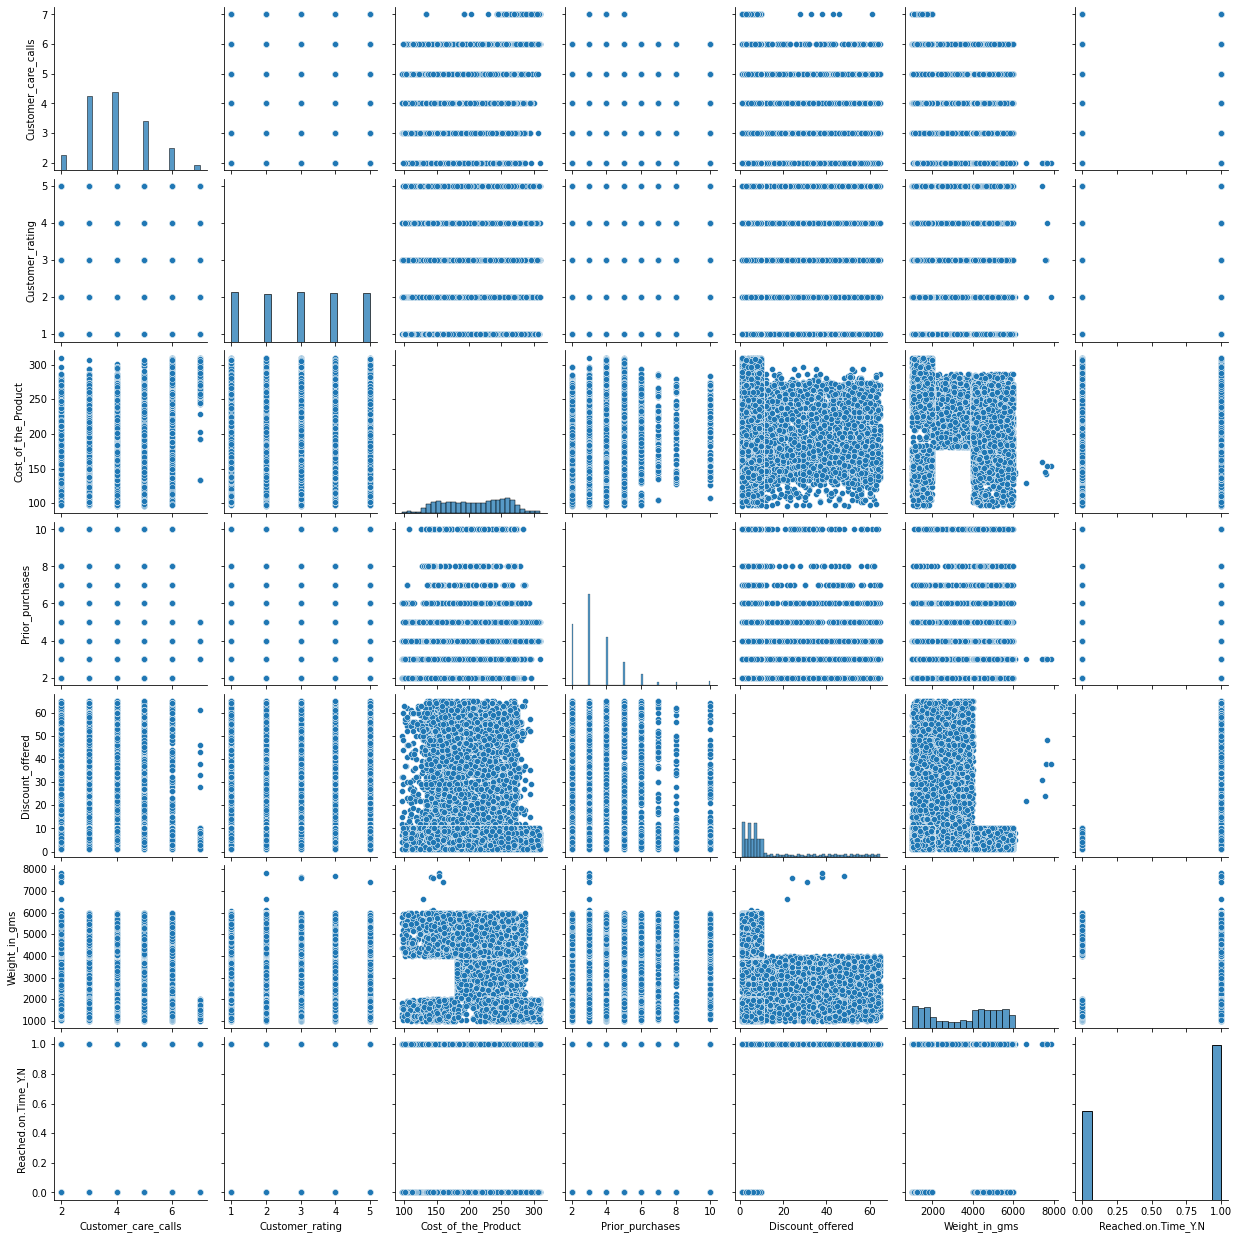

In [6]:
sns.pairplot(data1)

#### Observaciones
* Posibles outliers en la columna 'Weight_in_gms'
* Conjunto de datos desbalanceado en la variable target 'Reached.on.Time_Y.N'
* La variable 'Discount_offered' presenta la mayor parte de sus datos concentrado en lo valores mas bajos.

In [7]:
# Renombramos la columna 'Reached.on.Time_.Y.N' para que sea mas practica llamarla en las funciones:
data1.rename(columns={'Reached.on.Time_Y.N':'Reached_ontime'}, inplace=True)

Revisamos la distribucion de la columna 'Weight_in_gms'.<br>
Para corroborar la existencia de outliers en la columna 'Weight_in_gms' dibujamos un diagrama de caja.

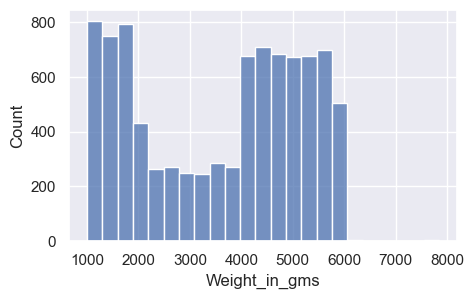

In [8]:
sns.set(rc={'figure.figsize':(5,3)})
sns.histplot(data=data1, x='Weight_in_gms');

Ahora comparamos esta misma distribucion en los datos de trainging con los datos de testing.

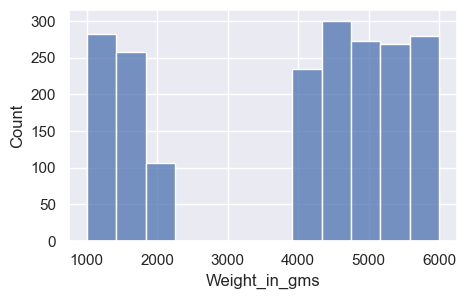

In [9]:
sns.set(rc={'figure.figsize':(5,3)})
sns.histplot(data=data2, x='Weight_in_gms');

Las distribuciones en ambos casos corresponde a una distribucion bimodal.<br>
En ambos casos se observa que la mayor parte de los datos se encuentra esta concentrada hasta un valor maximo de aproximadamente 6000 g.<br>


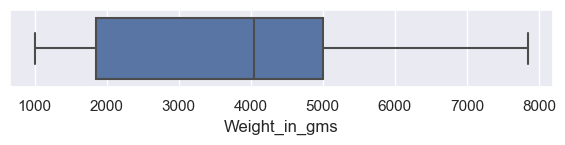

In [10]:
sns.set(rc={'figure.figsize':(7,1)})
sns.boxplot(data = data1, x= 'Weight_in_gms');

Aca los datos parecieran no tener outliers, pero como es una distribucion bimodal, separo los datos en dos conjuntos por la media y los analizo como dos distribucionespara hacer un analisis de outliers mas preciso.

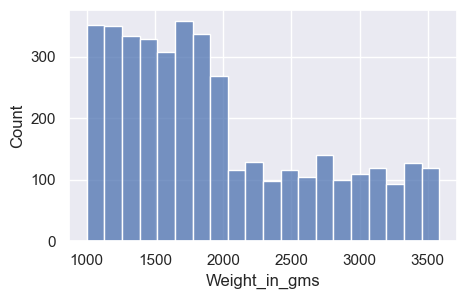

In [11]:
low_weight = pd.DataFrame(data1.Weight_in_gms[data1.Weight_in_gms < data1.Weight_in_gms.mean()])
sns.set(rc={'figure.figsize':(5,3)})
sns.histplot(data=low_weight, x='Weight_in_gms');

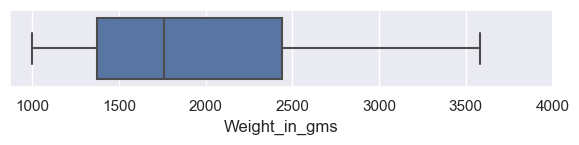

In [13]:
sns.set(rc={'figure.figsize':(7,1)})
bp = sns.boxplot(data = low_weight, x= 'Weight_in_gms')
xticks = list(range(1000, 4500, 500))
bp.set_xticks(xticks);

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Count'>

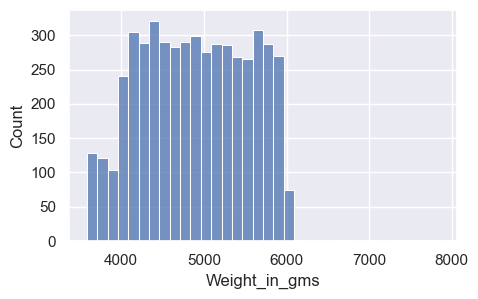

In [14]:
hight_weight = pd.DataFrame(data1.Weight_in_gms[data1.Weight_in_gms > data1.Weight_in_gms.mean()])
sns.set(rc={'figure.figsize':(5,3)})
sns.histplot(data=hight_weight, x='Weight_in_gms');

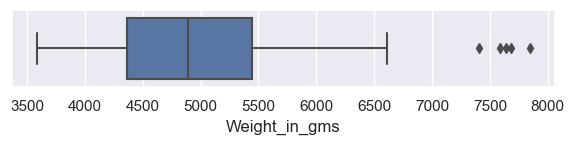

In [15]:
sns.set(rc={'figure.figsize':(7,1)})
bp = sns.boxplot(data = hight_weight, x= 'Weight_in_gms')
xticks = list(range(3500, 8500, 500))
bp.set_xticks(xticks);


In [16]:
q1 = np.quantile(hight_weight, 0.25)
q3 = np.quantile(hight_weight, 0.75)
ric = q3-q1
extr_sup = q3 + ric
ric

1087.0

Efectivamente hay outliers en la columna 'Weight_in_gms'

Revisamos la existencia de outliers en la columna 'Discount_offered' con un diagrama de caja.<br>
Revisamos la distribucion de la columna 'Discount_offered'.<br>

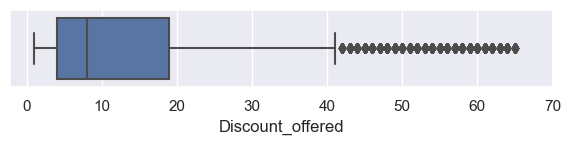

In [17]:
sns.set(rc={'figure.figsize':(7,1)})
bp = sns.boxplot(data = data1, x= 'Discount_offered')
xticks = list(range(0, 80, 10))
bp.set_xticks(xticks);

Se observa la presencia de outliers, por lo que se decide observar la distribucion de esta columna diferenciando por la variable target. Con esto pretendemos ver si la distribucion es uniforme para ambos casos, tanto positivos como negativos respecto al target

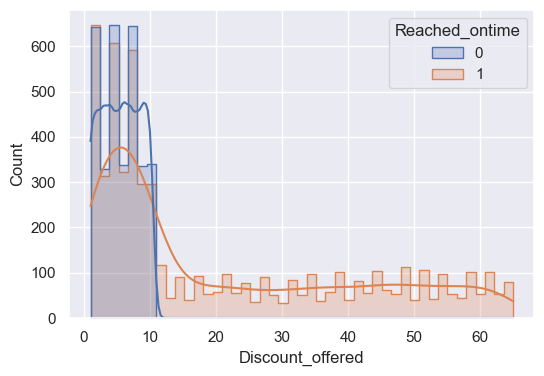

In [18]:
sns.set(rc={'figure.figsize':(6,4)})
sns.histplot(data=data1, x='Discount_offered', hue='Reached_ontime', element='step', kde=True);

Se observa que donde hubo demora en los desvios, la variable 'Discount_offered' parece no tomar valores mas altos que 10. Lo corroboramos de la siguiente manera:

In [19]:
data1.Discount_offered[data1.Reached_ontime == 0].describe()

count    3280.000000
mean        5.532012
std         2.877950
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: Discount_offered, dtype: float64

Recordemos que nuestro set de datos de testing toma el mismo intervalo de valores en esta variable. <br>
<br>
Ademas, se observa en la grafica del histograma que incluso en los casos de envios exitosos cuando la variable 'Discount_offered' es mayor a 10, el conteo baja considerablemente y pasa a tomar valores mas bajos. Esto genera ruido y la aparicion de los ya observados outliers en los datos. <br>
<br>
Por esto, se decide descartar los registros que tengan un valor 'Discount_offered' > 10.

In [20]:
data1_mod = data1[data1.Discount_offered <= 10]
data1_mod.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_ontime
ID,,,,,,,,,,,
4,B,Flight,3,3,176,4,medium,M,10,1177,1
7,D,Flight,3,4,250,3,low,F,3,2371,1
13,D,Flight,3,5,198,3,medium,F,1,3667,1
17,C,Flight,3,4,143,2,medium,F,6,1194,1
23,C,Ship,2,5,156,2,low,M,2,1750,1


In [21]:
data1_mod.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_ontime
count,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000
mean,4.126574,2.995592,213.714421,3.601385,5.473709,4091.737406,0.483627
std,1.175930,1.410416,48.471799,1.527201,2.874688,1570.853596,0.499771
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,173.000000,3.000000,3.000000,2881.000000,0.000000
50%,4.000000,3.000000,220.000000,3.000000,5.000000,4598.000000,0.000000
75%,5.000000,4.000000,254.000000,4.000000,8.000000,5294.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,10.000000,6102.000000,1.000000


Al eliminar los registros con 'Discount_offered' > 10, tambien ha disminuido el valor maximo de 'Weight_in_gms' donde se encontraban los outliers.

Revisamos rapidamente con un grafico las demas variables.

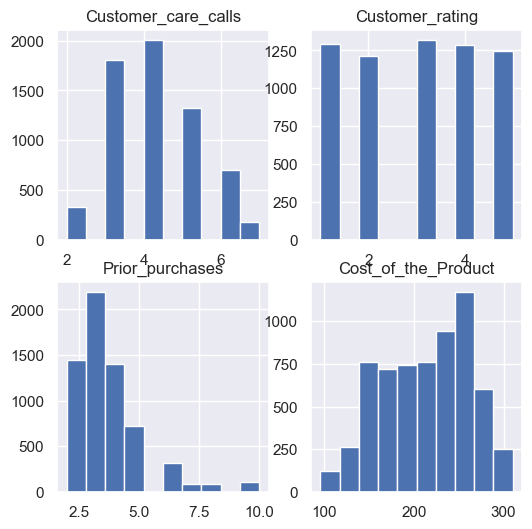

In [22]:
#'Customer_care_calls' 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases'
fig, axs = plt.subplots(2, 2, figsize=(6, 6), sharex=False, sharey=False)
axs[0, 0].hist(data1_mod.Customer_care_calls)
axs[0, 0].set_title('Customer_care_calls')
axs[0, 1].hist(data1_mod.Customer_rating)
axs[0, 1].set_title('Customer_rating')
axs[1, 1].hist(data1_mod.Cost_of_the_Product)
axs[1, 1].set_title('Cost_of_the_Product')
axs[1, 0].hist(data1_mod.Prior_purchases)
axs[1, 0].set_title('Prior_purchases');


Se observan distribuciones normales en 'Customer_care_calls', 'Cost_of_the_Product' y 'Prior_purchases', aunque en esta ultima hay un sesgo hacia la izquierda.<br>
En la variable 'Customer_rating' la distribucion es practicamente uniforme para cada valor

Observamos el comportamiento de estas variables en nuestros datos de test

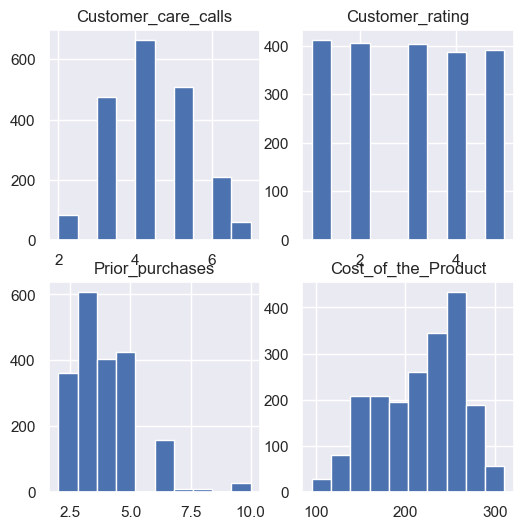

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6), sharex=False, sharey=False)
axs[0, 0].hist(data2.Customer_care_calls)
axs[0, 0].set_title('Customer_care_calls')
axs[0, 1].hist(data2.Customer_rating)
axs[0, 1].set_title('Customer_rating')
axs[1, 1].hist(data2.Cost_of_the_Product)
axs[1, 1].set_title('Cost_of_the_Product')
axs[1, 0].hist(data2.Prior_purchases)
axs[1, 0].set_title('Prior_purchases');

Se observan comportamientos muy parecidos entre el datset de training con el de testing, por lo que se decide dejar el conjunto de datos cuantitativos como estan para seguir trabajando en los cualitativos.<br>

### Variables cualitativas

Para poder incluir las variables cualitativas a nuestro modelo, procedemos a asignarles valores numericos.<br>

In [24]:
data_enc = data1_mod.copy()

In [25]:
data_enc.Product_importance.unique()

array(['medium', 'low', 'high'], dtype=object)

In [26]:
ord_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
ord_encoder.fit(data_enc[["Product_importance"]])
data_enc["Product_importance_enc"] = ord_encoder.transform(data_enc[["Product_importance"]])

In [27]:
data_enc[['Product_importance', 'Product_importance_enc']].head(10)

,Product_importance,Product_importance_enc
ID,,
4,medium,1.0
7,low,0.0
13,medium,1.0
17,medium,1.0
23,low,0.0
34,medium,1.0
46,low,0.0
49,medium,1.0
68,low,0.0


In [28]:
data_enc

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_ontime,Product_importance_enc
ID,,,,,,,,,,,,
4,B,Flight,3,3,176,4,medium,M,10,1177,1,1.0
7,D,Flight,3,4,250,3,low,F,3,2371,1,0.0
13,D,Flight,3,5,198,3,medium,F,1,3667,1,1.0
17,C,Flight,3,4,143,2,medium,F,6,1194,1,1.0
23,C,Ship,2,5,156,2,low,M,2,1750,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,D,Ship,3,1,217,3,low,F,1,4177,1,0.0
8996,F,Ship,5,3,232,3,medium,M,3,4526,0,1.0
8997,A,Ship,4,5,260,3,medium,F,6,4221,0,1.0


In [29]:
le = LabelEncoder()
data_enc['WarehouseBl_le'] =le.fit_transform(data_enc['Warehouse_block'])

In [30]:
data_enc[['Warehouse_block', 'WarehouseBl_le']].head()

,Warehouse_block,WarehouseBl_le
ID,,
4,B,1
7,D,3
13,D,3
17,C,2
23,C,2


In [31]:
data_enc['ModeShip_le'] =le.fit_transform(data_enc['Mode_of_Shipment'])
data_enc.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_ontime,Product_importance_enc,WarehouseBl_le,ModeShip_le
ID,,,,,,,,,,,,,,
4,B,Flight,3,3,176,4,medium,M,10,1177,1,1.0,1,0
7,D,Flight,3,4,250,3,low,F,3,2371,1,0.0,3,0
13,D,Flight,3,5,198,3,medium,F,1,3667,1,1.0,3,0
17,C,Flight,3,4,143,2,medium,F,6,1194,1,1.0,2,0
23,C,Ship,2,5,156,2,low,M,2,1750,1,0.0,2,2


In [32]:
dummies = pd.get_dummies(data_enc['Gender'], drop_first = True)
data_enc = pd.concat([data_enc, dummies], axis=1)
data_enc.rename(columns={'M':'Gender_M'}, inplace=True)
data_enc.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_ontime,Product_importance_enc,WarehouseBl_le,ModeShip_le,Gender_M
ID,,,,,,,,,,,,,,,
4,B,Flight,3,3,176,4,medium,M,10,1177,1,1.0,1,0,1
7,D,Flight,3,4,250,3,low,F,3,2371,1,0.0,3,0,0
13,D,Flight,3,5,198,3,medium,F,1,3667,1,1.0,3,0,0
17,C,Flight,3,4,143,2,medium,F,6,1194,1,1.0,2,0,0
23,C,Ship,2,5,156,2,low,M,2,1750,1,0.0,2,2,1


Ahora que ya tenemos codificadas todas nuestras variables categoricas, procedemos a descartar las columnas procesadas y nos quedamos solo con las que tienen valores numericos.

In [33]:
data_enc.drop(columns=['Warehouse_block', 'Mode_of_Shipment', 'Gender','Product_importance'], inplace=True)

In [34]:
data_enc.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_ontime,Product_importance_enc,WarehouseBl_le,ModeShip_le,Gender_M
ID,,,,,,,,,,,
4,3,3,176,4,10,1177,1,1.0,1,0,1
7,3,4,250,3,3,2371,1,0.0,3,0,0
13,3,5,198,3,1,3667,1,1.0,3,0,0
17,3,4,143,2,6,1194,1,1.0,2,0,0
23,2,5,156,2,2,1750,1,0.0,2,2,1


In [35]:
data_enc.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_ontime,Product_importance_enc,WarehouseBl_le,ModeShip_le,Gender_M
count,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000
mean,4.126574,2.995592,213.714421,3.601385,5.473709,4091.737406,0.483627,0.602960,2.327613,1.519521,0.499370
std,1.175930,1.410416,48.471799,1.527201,2.874688,1570.853596,0.499771,0.645304,1.491974,0.754306,0.500039
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,173.000000,3.000000,3.000000,2881.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,4.000000,3.000000,220.000000,3.000000,5.000000,4598.000000,0.000000,1.000000,2.000000,2.000000,0.000000
75%,5.000000,4.000000,254.000000,4.000000,8.000000,5294.000000,1.000000,1.000000,4.000000,2.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,10.000000,6102.000000,1.000000,2.000000,4.000000,2.000000,1.000000


Hacemos el mismo tratamiento con los datos de testing.

In [36]:
data2_enc = data2.copy()
ord_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
data2_enc["Product_importance_enc"] = ord_encoder.fit_transform(data2_enc[["Product_importance"]])
le = LabelEncoder()
data2_enc['WarehouseBl_le'] =le.fit_transform(data2_enc['Warehouse_block'])
data2_enc['ModeShip_le'] = le.fit_transform(data2_enc['Mode_of_Shipment'])
dummies = pd.get_dummies(data2_enc['Gender'], drop_first = True)
data2_enc = pd.concat([data2_enc, dummies], axis=1)
data2_enc.rename(columns={'M':'Gender_M'}, inplace=True)
data2_enc.drop(columns=['Warehouse_block', 'Mode_of_Shipment', 'Gender','Product_importance'], inplace=True)
data2_enc.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_enc,WarehouseBl_le,ModeShip_le,Gender_M
ID,,,,,,,,,,
9000,5,1,189,2,10,5248,1.0,4,2,1
9001,5,3,150,2,9,4446,2.0,3,2,0
9002,3,3,200,3,3,5739,0.0,4,2,1
9003,5,1,133,2,1,4643,1.0,0,2,1
9004,4,2,260,3,4,5504,0.0,1,2,1


In [37]:
data2_enc.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_enc,WarehouseBl_le,ModeShip_le,Gender_M
count,2000.000000,2000.00000,2000.000000,2000.00000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.231500,2.97050,217.555000,3.82000,5.61400,3857.42650,0.563000,2.334500,1.505000,0.497500
std,1.136465,1.41585,46.336276,1.45453,2.90469,1707.78448,0.601009,1.490879,0.761751,0.500119
min,2.000000,1.00000,96.000000,2.00000,1.00000,1003.00000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.00000,179.750000,3.00000,3.00000,1773.75000,0.000000,1.000000,1.000000,0.000000
50%,4.000000,3.00000,226.000000,4.00000,6.00000,4536.00000,1.000000,3.000000,2.000000,0.000000
75%,5.000000,4.00000,255.000000,5.00000,8.00000,5241.25000,1.000000,4.000000,2.000000,1.000000
max,7.000000,5.00000,310.000000,10.00000,10.00000,6000.00000,2.000000,4.000000,2.000000,1.000000


Vamos a analizar las correlaciones entre las columnas para hacer una disminucion de la dimensionalidad

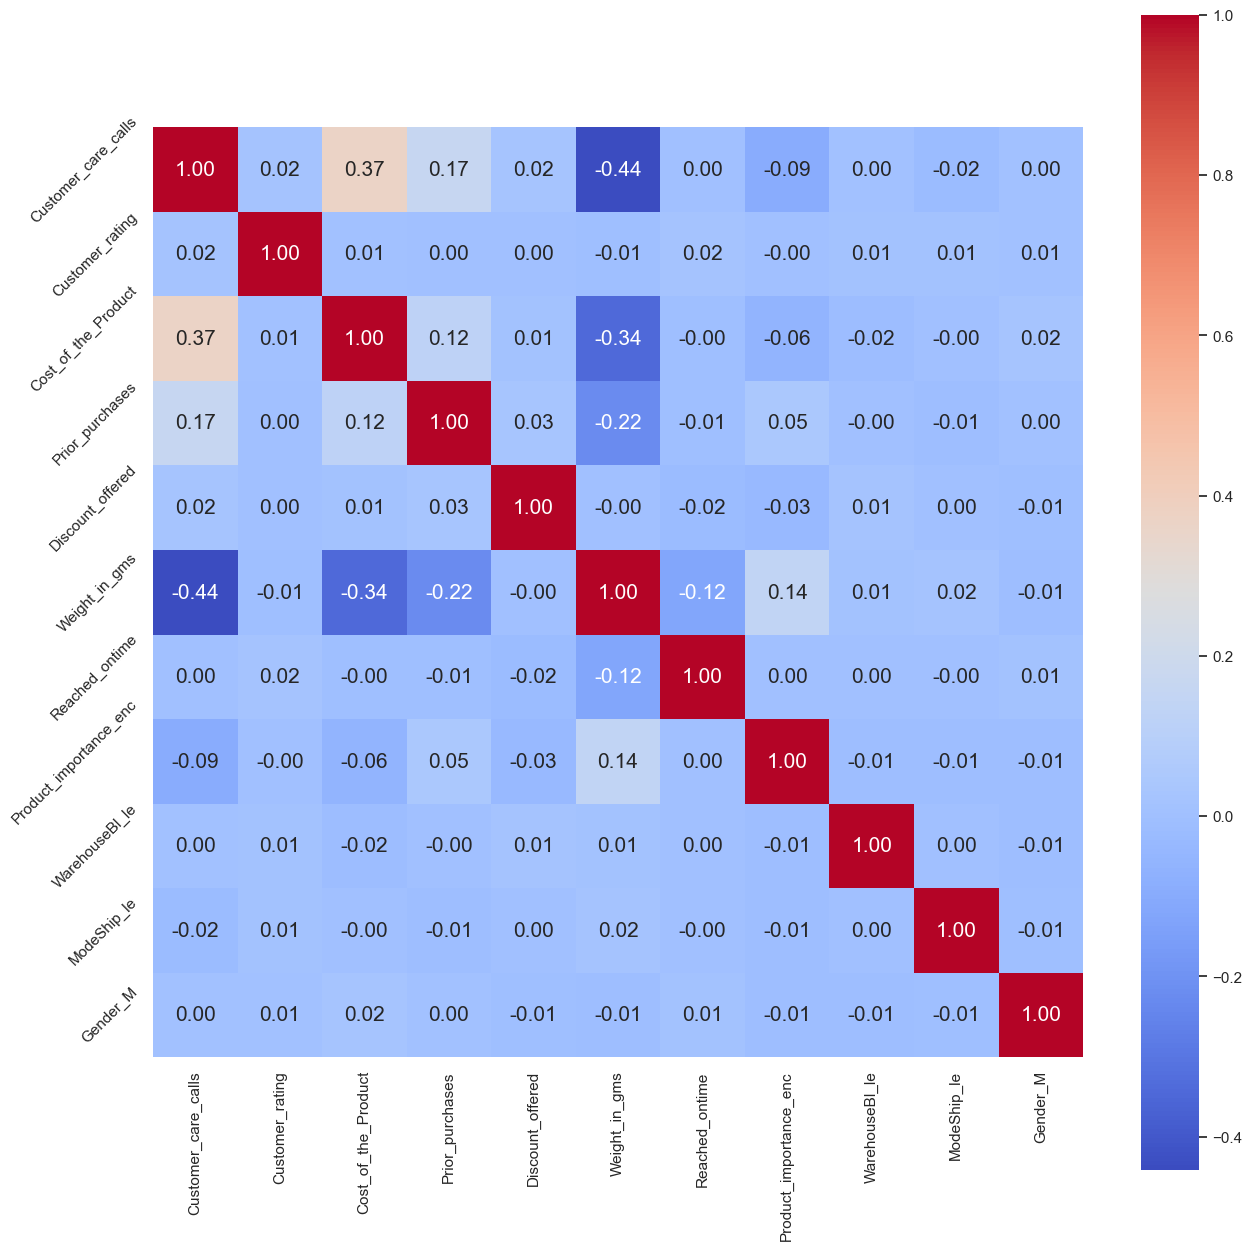

In [38]:
corr = data_enc.corr() 
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data_enc.columns, 
           yticklabels= data_enc.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.show()

### Observaciones
* La variable objetivo tiene poca, o nula correlacion con las variables del data set.
* La unica variable presenta una leve correlacion con el target es la columna 'Weight_in_gms'


Al tratarse de una problematica en la logistica, se considera que la variable 'Genero' no es relevante para el caso y se decide descartar la columna.

In [40]:
data_enc.drop(columns='Gender_M', inplace = True)
data_enc.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_ontime,Product_importance_enc,WarehouseBl_le,ModeShip_le
ID,,,,,,,,,,
4,3,3,176,4,10,1177,1,1.0,1,0
7,3,4,250,3,3,2371,1,0.0,3,0
13,3,5,198,3,1,3667,1,1.0,3,0
17,3,4,143,2,6,1194,1,1.0,2,0
23,2,5,156,2,2,1750,1,0.0,2,2


In [42]:
data2_enc = data2.copy()
ord_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
data2_enc["Product_importance_enc"] = ord_encoder.fit_transform(data2_enc[["Product_importance"]])
le = LabelEncoder()
data2_enc['WarehouseBl_le'] =le.fit_transform(data2_enc['Warehouse_block'])
data2_enc['ModeShip_le'] = le.fit_transform(data2_enc['Mode_of_Shipment'])
data2_enc.drop(columns=['Warehouse_block', 'Mode_of_Shipment', 'Gender','Product_importance'], inplace=True)
data2_enc.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_enc,WarehouseBl_le,ModeShip_le
ID,,,,,,,,,
9000,5,1,189,2,10,5248,1.0,4,2
9001,5,3,150,2,9,4446,2.0,3,2
9002,3,3,200,3,3,5739,0.0,4,2
9003,5,1,133,2,1,4643,1.0,0,2
9004,4,2,260,3,4,5504,0.0,1,2


In [44]:
train1 = data_enc.to_csv('train1.csv', index = False)
#train2 = data_enc.drop(columns=['Gender_M', 'ModeShip_le', 'WarehouseBl_le', 'Customer_rating']).to_csv('train2.csv', index = False)
test = data2_enc.to_csv('test.csv', index = False)